In [95]:
from reviewsdataset import getReviews, getBookMetadata, loadBatchListwise
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

In [22]:
reviews = getReviews()[:1000]
metadata = getBookMetadata()

In [23]:
len(reviews)

1000

In [24]:
reviews[0]

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'timestamp': '2014-07-26',
 'review_sentences': [[0, 'What a fun series.'],
  [0,
   'I loved Wool, and Dust and Shift both gave us the backstory to explain the world and how it ended up.'],
  [0,
   'I think the first book was by far the best, but this gave us a nice conclusion.'],
  [1,
   'It was the conclusion we wanted to see - the people finally get outside!'],
  [1, 'My problem with this book is there were lots of holes.'],
  [1,
   "A lot of the other reviews have pointed this out too, and I'm not sure if the fact I know it was self-published is biasing me to say it could have used more editing, but feels that way a little."],
  [1, 'But the writing was great.'],
  [1,
   "There were lots of things that weren't cleared up or never really fully made sense."],
  [1,
   'The major one is why Thurman really felt the need to destroy the whole world - feels like there could have been a lot more to that.'],
  [1,
   "It also wasn't clea

In [25]:
metadata[reviews[5]['book_id']]

"The Handmaid's Tale"

In [37]:
batchedReviews = [loadBatchListwise(r, i) for i, r in enumerate(reviews)]

In [ ]:
# Number of unique books in our reviews

In [61]:
len(set([r['book_id'] for r in reviews]))

859

In [ ]:
# Number of review sentences

In [65]:
sum([len(r['review_sentences']) for r in reviews])

18969

In [ ]:
# Average length of reviews (in number of sentences)

In [67]:
sum([len(r['review_sentences']) for r in reviews])/len(reviews)

18.969

In [ ]:
# Average number of spoiler sentences in a review

In [73]:
sum([sum(r['labels']) for r in batchedReviews])/len(batchedReviews)

4.806

In [ ]:
# Average position of a spoiler sentence in a review

In [75]:
num = 0
denom = 0
for i, r in enumerate(batchedReviews):
    positions = np.array(batchedReviews[i]['positions']).astype(int)
    labels = np.array(batchedReviews[i]['labels']).astype(int)
    num += sum(positions*labels)
    denom += sum(labels)
num/denom

20.763836870578444

In [ ]:
# Lets look at distributions of spoilers

In [ ]:
# Distribution of number of spoilers in a review

In [93]:
np.unique([sum(r['labels']) for r in batchedReviews])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  26,  29,
        30,  31,  32,  36,  37,  38,  47,  56,  58,  61,  64,  74,  81,
       123])

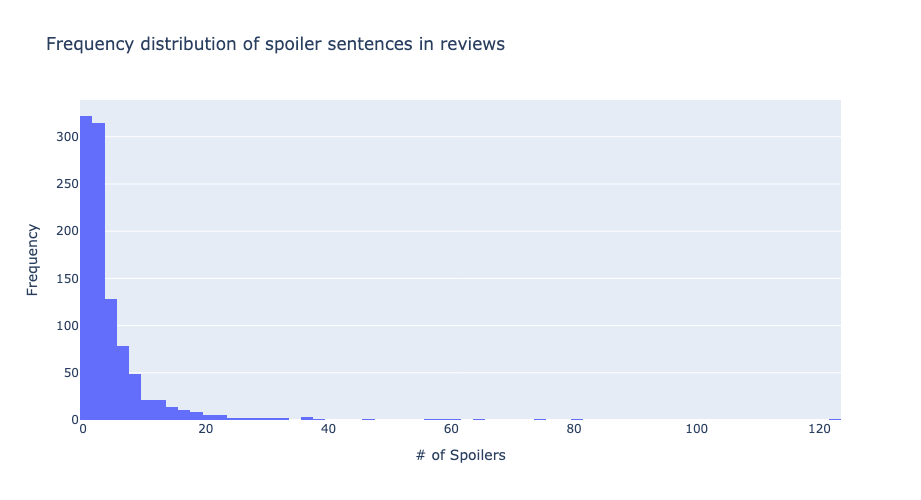

In [192]:
data = [sum(r['labels']) for r in batchedReviews]
# Create a histogram
fig = px.histogram(data, x=data, nbins=100, title="Frequency distribution of spoiler sentences in reviews")
fig.update_layout(xaxis_title="# of Spoilers", yaxis_title="Frequency", width=500, height=500)
fig.show()

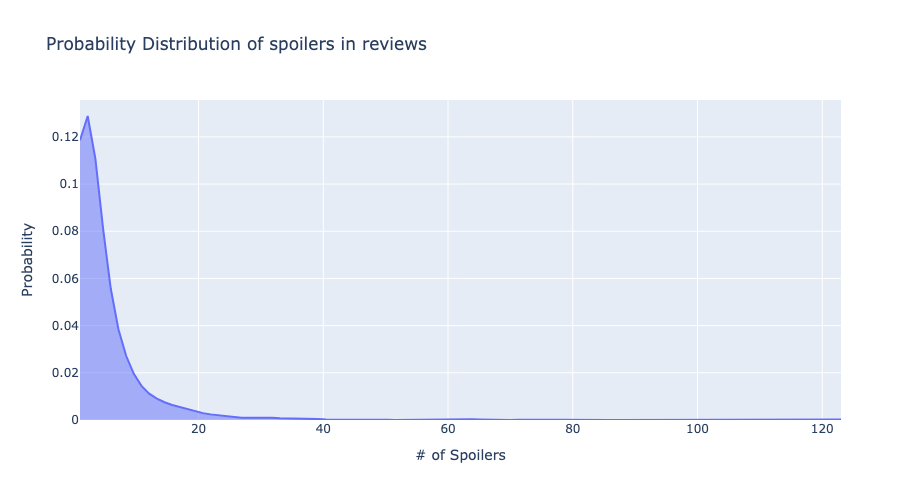

In [126]:
# Calculate the Kernel Density Estimate (KDE)
kde = gaussian_kde(data)
x_range = np.linspace(min(data), max(data), 100)  # Create a range for x-axis
kde_values = kde(x_range)  # Evaluate the KDE at those points

# Create a smooth line plot for the KDE
fig = px.area(x=x_range, y=kde_values, labels={'x': '# of Spoilers', 'y': 'Frequency'}, title="Probability Distribution of spoilers in reviews")
fig.update_layout(xaxis_title="# of Spoilers", yaxis_title="Probability", width=500, height=500)
fig.show()

In [ ]:
# Positional distribution of spoilers

In [168]:
data = []
for i, r in enumerate(batchedReviews):
    positions = np.array(batchedReviews[i]['positions']).astype(int)
    labels = np.array(batchedReviews[i]['labels']).astype(int)
    data.extend([p for p in positions*labels if p != 0])

In [170]:
np.mean(data)

20.933710929305644

In [172]:
np.median(data)

15.0

In [173]:
np.unique(data)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])

In [176]:
# Considering only reviews that close to the average length

In [196]:
data = []
for i, r in enumerate(batchedReviews):
    positions = np.array(batchedReviews[i]['positions']).astype(int)
    labels = np.array(batchedReviews[i]['labels']).astype(int)
    data.extend([p for p in positions*labels if p != 0 and p<26])

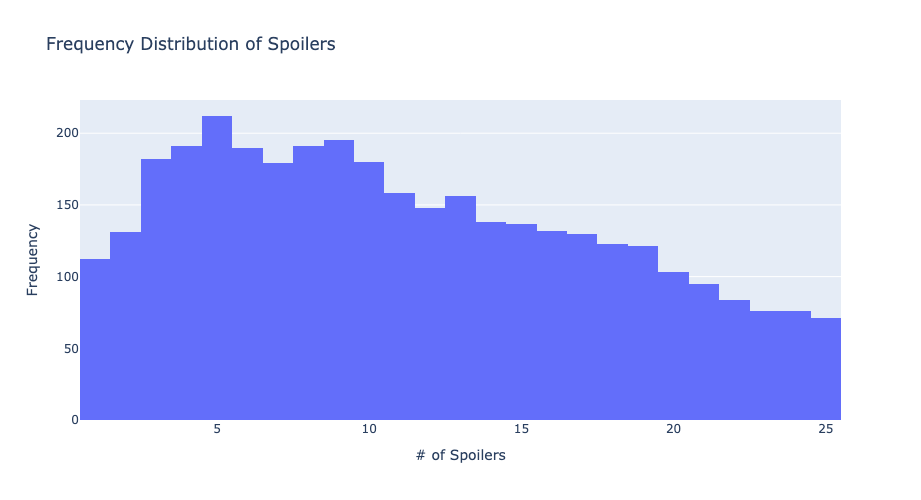

In [198]:
# Create a histogram
fig = px.histogram(data, x=data, nbins=30, title="Frequency Distribution of Spoilers")
fig.update_layout(xaxis_title="# of Spoilers", yaxis_title="Frequency", width=500, height=500)
fig.show()

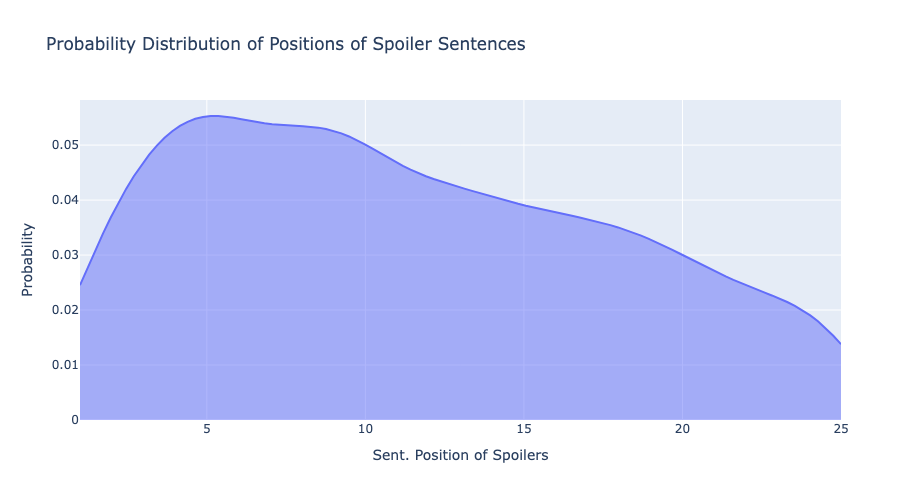

In [200]:
# Calculate the Kernel Density Estimate (KDE)
kde = gaussian_kde(data)
x_range = np.linspace(min(data), max(data), 100)  # Create a range for x-axis
kde_values = kde(x_range)  # Evaluate the KDE at those points

# Create a smooth line plot for the KDE
fig = px.area(x=x_range, y=kde_values, labels={'x': 'Sent. Position of Spoilers', 'y': 'Probability'}, title="Probability Distribution of Positions of Spoiler Sentences")
fig.update_layout(xaxis_title="Sent. Position of Spoilers", yaxis_title="Probability", width=500, height=500)
fig.show()